<a href="https://colab.research.google.com/github/ClairtonZerwes/visao_computacional_tf_keras_opncv_aula10_cnn/blob/main/atividade1_Aula10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import cv2
import random
import requests
import numpy as np
import pandas as pd
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt

from PIL import Image
from sklearn.svm import SVC
from keras import backend as k
from keras.layers import Dense
from sklearn import preprocessing
from keras.datasets import cifar10
from keras.models import Sequential
from sklearn import svm, metrics, neighbors
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.preprocessing.image import ImageDataGenerator
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split, KFold

!pip install tensorflow keras

from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Carregar o conjunto de dados CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalizar os valores dos pixels para o intervalo [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

# Criar o modelo CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10)
])

# Compilar o modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Treinar o modelo
# history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Avaliar o modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nAcurácia do teste:', test_acc)

2.19.0
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.3487 - loss: 1.7633 - val_accuracy: 0.5398 - val_loss: 1.2929
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.5740 - loss: 1.1972 - val_accuracy: 0.6241 - val_loss: 1.0721
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.6436 - loss: 1.0139 - val_accuracy: 0.6615 - val_loss: 0.9738
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.6775 - loss: 0.9128 - val_accuracy: 0.6867 - val_loss: 0.8974
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.7054 - loss: 0.8377 - val_accuracy: 0.6709 - val_loss: 0.9354
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.7292 - loss: 0.7710 - val_accuracy: 0.6867 - val_loss: 0.9323
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 25ms/step - accuracy: 0.7503 - loss: 0.7172 - val_accuracy: 0.6985 - val_loss: 0.8776
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.7621 -

# README.md
# 🚀 Classificação de Imagens com Rede Neural Convolucional (CNN)

Este projeto implementa e treina um modelo de Rede Neural Convolucional (CNN) para a classificação de imagens utilizando o conjunto de dados **CIFAR-10**. O objetivo é demonstrar o fluxo de trabalho completo de um projeto de Deep Learning, desde o pré-processamento dos dados até a avaliação do modelo.

---

### 🎯 Objetivo do Projeto

O objetivo principal é classificar 60.000 imagens de 10 classes diferentes (como aviões, carros, pássaros, etc.) de forma automatizada. A acurácia do modelo será a principal métrica para avaliar o seu desempenho.

---

### ⚙️ Etapas do Projeto

O código segue um fluxo de trabalho padrão para problemas de classificação de imagens:

1.  **Carregamento e Pré-processamento dos Dados:**
    * O conjunto de dados CIFAR-10 é carregado diretamente do `tensorflow.keras.datasets`.
    * As imagens são normalizadas para um intervalo de 0 a 1, o que é uma prática recomendada para o treinamento de redes neurais.

2.  **Criação da Arquitetura da CNN:**
    * Uma rede neural sequencial é construída com camadas de **Convolução (`Conv2D`)** para extrair as características das imagens.
    * Camadas de **Pooling (`MaxPooling2D`)** são usadas para reduzir a dimensionalidade e o número de parâmetros, mantendo as características essenciais.
    * As últimas camadas (`Flatten` e `Dense`) são responsáveis pela classificação final das 10 classes.

3.  **Treinamento e Avaliação do Modelo:**
    * O modelo é compilado com um otimizador (`adam`) e uma função de perda (`SparseCategoricalCrossentropy`).
    * É treinado por 10 épocas, com a acurácia sendo monitorada para avaliar o progresso do aprendizado.
    * Por fim, o modelo é avaliado com um conjunto de dados de teste para verificar sua performance em dados não vistos.

---

### 💻 Tecnologias e Bibliotecas Utilizadas

* **Python:** Linguagem de programação principal.
* **TensorFlow & Keras:** Principais frameworks para a construção e treinamento da rede neural.
* **NumPy:** Utilizado para manipulação de arrays e dados numéricos.
* **Matplotlib:** Para a visualização dos resultados.
* **Scikit-learn:** Para métricas e funções de apoio.
* **OpenCV (`cv2`):** Para manipulação de imagens.

---

### 📄 Como Executar o Código

Para rodar este projeto em sua máquina, siga os passos abaixo:

1.  **Instale as dependências:**
    ```bash
    pip install tensorflow keras numpy matplotlib opencv-python
    ```
    *Obs: `TensorFlow` já inclui o `Keras` e outras dependências, mas é uma boa prática listá-las.*

2.  **Execute o script Python:**
    ```bash
    python atividade1_Aula10_CNN.ipynb
    *Executado no ambiente do Google Colab
    ```

---

### 📈 Resultados Esperados

Ao executar o script, o console exibirá o progresso do treinamento a cada época, incluindo a perda (`loss`) e a acurácia. No final, será impressa a acurácia final do modelo no conjunto de dados de teste.

In [5]:
# README.md

# 🚀 Classificação de Imagens com Rede Neural Convolucional (CNN)

"""
Este projeto implementa e treina um modelo de Rede Neural Convolucional (CNN)
para a classificação de imagens utilizando o conjunto de dados **CIFAR-10**.
O objetivo é demonstrar o fluxo de trabalho completo de um projeto de
Deep Learning, desde o pré-processamento dos dados até a avaliação do modelo.
"""

#---

### 🎯 Objetivo do Projeto
"""
O objetivo principal é classificar 60.000 imagens de 10 classes diferentes
(como aviões, carros, pássaros, etc.) de forma automatizada. A acurácia
do modelo será a principal métrica para avaliar o seu desempenho.
"""

### 📈 Resultados Esperados
"""
Ao executar o script, o console exibirá o progresso do treinamento a cada época,
incluindo a perda (`loss`) e a acurácia. No final, será impressa a acurácia
final do modelo no conjunto de dados de teste.
"""

'\nAo executar o script, o console exibirá o progresso do treinamento a cada época, \nincluindo a perda (`loss`) e a acurácia. No final, será impressa a acurácia \nfinal do modelo no conjunto de dados de teste.\n'

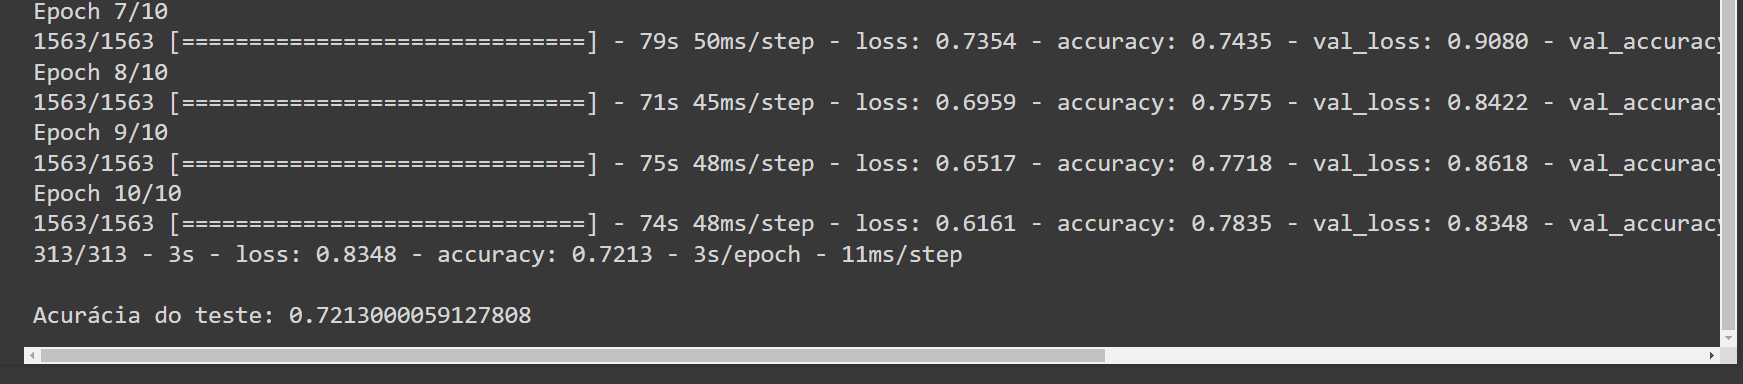